# <center>Surprise Housing - Property Price Prediction</center>

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price.<BR>
The company is looking at prospective properties to buy to enter the market.<BR><BR>

## Goal
<UL>
    <LI>Build Regression model using regularisation to predict price of property  </LI>
    <LI>Identify variables which are significant in price prediction</LI>
    <LI>How accurately we can predict the price based on above identified independent variable </LI>
</UL>

### Load Libraries & Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [147]:
pd.set_option("display.max_column", 150)

In [5]:
housingDF =pd.read_csv("train.csv")
housingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#housingDF.set_index('Id', inplace=True)
housingDF.shape

(1460, 81)

## Data Cleaning

In [7]:
housingDF.describe(percentiles=[0.05,0.25,0.5,0.75,0.95, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.0000

There are few outlieres in dataset.

In [8]:
housingDF.drop(columns=housingDF.describe().columns).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


We have total **1460** observation in data set.<BR>
For **Utilities** column which have 2 different categorical values, **1459** observation have unique value **AllPub** out of **1460**, so this column will not help in prediction, hence will drop this column.<BR>
Similarly there are few other columns which have very les variance (or 95 To 100% data contain same categorical value) like **Street, Condition2, RoofMatl, Heating, etc. **, will analys these columns seprtaly after data cleanup.

In [9]:
housingDF.drop(labels=['Utilities','Id'], inplace=True, axis=1)

In [10]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-

In [11]:
missingData = housingDF.isnull().sum() / housingDF.index.size * 100
missingData[missingData > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [12]:
#Will drop column with more than 40% missing data.
housingDF.drop(labels=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], inplace=True, axis=1)

Aprt from **LotFrontage** column, other remaning columns have 0.5 - 6 % missing data, will drop missingdata rows instead of imputing some data and introduce baised values. 

In [13]:
housingDF.dropna(subset=missingData[(missingData > 0) & (missingData < 6)].index, inplace=True)

In [14]:
housingDF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
#Drop rows 
missingData = housingDF.isnull().sum() / housingDF.index.size * 100
print(missingData[missingData > 0])
housingDF[missingData[missingData > 0].index].describe(percentiles=[0.5,0.9,0.99])

LotFrontage    18.236173
dtype: float64


,LotFrontage
count,1094.000000
mean,70.759598
std,24.508859
min,21.000000
50%,70.000000
90%,96.000000
99%,141.210000
max,313.000000


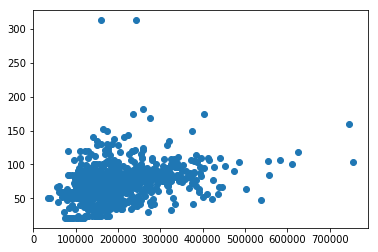

In [16]:
plt.scatter(housingDF['SalePrice'], housingDF['LotFrontage'])

We cannot drop **LotFrontage** column, as it can be usefull in model prediction.<BR>
Also imputing **18%** data is not good idea, so will drop missing data rows for this columm also. 

In [17]:
housingDF.dropna(subset=['LotFrontage'], inplace=True)

In [18]:
missingData = housingDF.isnull().sum() / housingDF.index.size * 100
missingData[missingData > 0]

Series([], dtype: float64)

**No Missing Data in data set**

In [19]:
#Check for duplicate rows
housingDF[housingDF.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [20]:
housingDF.shape

(1094, 74)

From total 1460 observation we left with 1094 observations, approx 26% data removed.

## Data Prepration

In [21]:
#Print Missing value count and Percent of data missing
#Create data frame which have rows for each category of that column.
#Calculate each value count for each category and Mean Sale Price for that Category.
def GetValueCount(colName):
    tempDF = housingDF[[colName,'SalePrice']].copy()
    print("****** " + colName + " *****")

    # Including NaN value count
    valCountSer = tempDF[colName].value_counts() 
    df = pd.DataFrame(data=valCountSer)
    
    #df = df.merge(tempDF.groupby(by=colName, observed=False ).sum()[['Converted']], left_index=True, right_index=True)

    df[colName + ' %'] = round(df[colName] / df[colName].sum() * 100, 2)
    df = df.merge(tempDF.groupby(by=colName, observed=False).mean()[['SalePrice']], left_index=True, right_index=True)
   
    print(df.sort_values(by=colName, ascending=False))
    print()

### Categorical Data

In [22]:
dummy = [GetValueCount(col) for col in housingDF.columns[housingDF.dtypes == 'object']]

****** MSZoning *****
         MSZoning  MSZoning %      SalePrice
RL            850       77.70  198119.980000
RM            173       15.81  130750.456647
FV             54        4.94  218930.814815
RH              9        0.82  127214.888889
C (all)         8        0.73   78172.500000

****** Street *****
      Street  Street %      SalePrice
Pave    1090     99.63  187321.740367
Grvl       4      0.37  108423.250000

****** LotShape *****
     LotShape  LotShape %      SalePrice
Reg       760       69.47  169215.210526
IR1       301       27.51  225413.943522
IR2        26        2.38  252321.846154
IR3         7        0.64  228695.000000

****** LandContour *****
     LandContour  LandContour %      SalePrice
Lvl          991          90.59  186178.211907
Bnk           45           4.11  145898.555556
HLS           44           4.02  239051.068182
Low           14           1.28  216292.857143

****** LotConfig *****
         LotConfig  LotConfig %      SalePrice
Inside       

      Heating  Heating %      SalePrice
GasA     1075      98.26  187447.452093
GasW       16       1.46  175148.687500
Grav        2       0.18   88250.000000
OthW        1       0.09  129500.000000

****** HeatingQC *****
    HeatingQC  HeatingQC %      SalePrice
Ex        594        54.30  221357.579125
TA        298        27.24  141028.187919
Gd        174        15.90  158137.287356
Fa         27         2.47  129581.481481
Po          1         0.09   87000.000000

****** CentralAir *****
   CentralAir  CentralAir %      SalePrice
Y        1036          94.7  191211.827220
N          58           5.3  112395.465517

****** Electrical *****
       Electrical  Electrical %      SalePrice
SBrkr        1009         92.23  192516.100099
FuseA          67          6.12  124824.000000
FuseF          15          1.37  115029.133333
FuseP           2          0.18  105000.000000
Mix             1          0.09   67000.000000

****** KitchenQual *****
    KitchenQual  KitchenQual %      S

Will reduce categories using following steps/rules:<BR>
- Combining less variance data
- Drop that categorical column if single categorical value explaining more than 95 - 100 % data.
- Convert categorical column to Ordinal scale.

Will apply Dummification Or Binary Encoding on remaning categorical column after data analysis.

Almost 93% data explained by top 2 MSZoning categories **RL, RM**.<BR>
Will create new category and assign this category to remaining 7% rows.

In [23]:
housingDF['MSZoning'] = housingDF['MSZoning'].apply (lambda v : v if v in (['RL', 'RM']) else 'FV_RH_C')
GetValueCount('MSZoning')

****** MSZoning *****
         MSZoning  MSZoning %      SalePrice
RL            850       77.70  198119.980000
RM            173       15.81  130750.456647
FV_RH_C        71        6.49  191444.760563



In [24]:
#99.63% properties have 'Pave' type of road access to street, very less variance explained by this feature, hence will drop this feature  
#Same issue with 'Condition2','RoofMatl'
housingDF.drop(labels=['Street','Condition2','RoofMatl'], inplace=True, axis=1)

In [25]:
housingDF['LotShape'] = housingDF['LotShape'].apply (lambda v : v if v in (['Reg', 'IR1']) else 'IR2_IR3')
GetValueCount('LotShape')

****** LotShape *****
         LotShape  LotShape %      SalePrice
Reg           760       69.47  169215.210526
IR1           301       27.51  225413.943522
IR2_IR3        33        3.02  247310.090909



In [26]:
housingDF['LandContour'] = housingDF['LandContour'].apply (lambda v : v if v in (['Lvl']) else 'Bnk_HLS_Low')
GetValueCount('LandContour')

****** LandContour *****
             LandContour  LandContour %      SalePrice
Lvl                  991          90.59  186178.211907
Bnk_HLS_Low          103           9.41  195260.019417



In [27]:
housingDF['LotConfig'] = housingDF['LotConfig'].apply (lambda v : v if v in (['Inside', 'Corner']) else 'CulDSac_FR2_FR3')
GetValueCount('LotConfig')

****** LotConfig *****
                 LotConfig  LotConfig %      SalePrice
Inside                 830        75.87  182784.553012
Corner                 187        17.09  186556.930481
CulDSac_FR2_FR3         77         7.04  233987.857143



In [28]:
housingDF['Condition1'] = housingDF['Condition1'].apply (lambda v : v if v in (['Norm']) else 'Other_Condition1')
GetValueCount('Condition1')

****** Condition1 *****
                  Condition1  Condition1 %      SalePrice
Norm                     950         86.84  191191.477895
Other_Condition1         144         13.16  159600.597222



In [29]:
housingDF['BldgType'] = housingDF['BldgType'].apply (lambda v : v if v in (['1Fam']) else 'Other_BldgType')
GetValueCount('BldgType')

****** BldgType *****
                BldgType  BldgType %      SalePrice
1Fam                 925       84.55  191180.939459
Other_BldgType       169       15.45  164331.485207



In [30]:
housingDF['HouseStyle'] = housingDF['HouseStyle'].apply (lambda v : v if v in (['1Story','2Story','1.5Fin']) else 'Other_HouseStyle')
GetValueCount('HouseStyle')

****** HouseStyle *****
                  HouseStyle  HouseStyle %      SalePrice
1Story                   540         49.36  184475.400000
2Story                   346         31.63  214448.358382
1.5Fin                   117         10.69  143244.410256
Other_HouseStyle          91          8.32  154274.131868



In [31]:
housingDF['RoofStyle'] = housingDF['RoofStyle'].apply (lambda v : v if v in (['Gable','Hip']) else 'Other_RoofStyle')
GetValueCount('RoofStyle')

****** RoofStyle *****
                 RoofStyle  RoofStyle %      SalePrice
Gable                  843        77.06  175692.137604
Hip                    230        21.02  229401.908696
Other_RoofStyle         21         1.92  178260.904762



In [32]:
housingDF['Foundation'] = housingDF['Foundation'].apply (lambda v : v if v in (['PConc','CBlock','BrkTil']) else 'Stone_Wood')
GetValueCount('Foundation')

****** Foundation *****
            Foundation  Foundation %      SalePrice
PConc              518         47.35  232476.123552
CBlock             446         40.77  147916.941704
BrkTil             122         11.15  138672.516393
Stone_Wood           8          0.73  162844.375000



In [33]:
housingDF['Heating'] = housingDF['Heating'].apply (lambda v : v if v in (['GasA']) else 'Other_Heating')
GetValueCount('Heating')

****** Heating *****
               Heating  Heating %      SalePrice
GasA              1075      98.26  187447.452093
Other_Heating       19       1.74  163598.894737



In [34]:
housingDF['Electrical'] = housingDF['Electrical'].apply (lambda v : v if v in (['SBrkr']) else 'Other_Electrical')
GetValueCount('Electrical')

****** Electrical *****
                  Electrical  Electrical %      SalePrice
SBrkr                   1009         92.23  192516.100099
Other_Electrical          85          7.77  121948.764706



In [35]:
housingDF['GarageType'] = housingDF['GarageType'].apply (lambda v : v if v in (['Attchd', 'Detchd']) else 'Other_GarageType')
GetValueCount('GarageType')

****** GarageType *****
                  GarageType  GarageType %      SalePrice
Attchd                   680         62.16  206032.066176
Detchd                   325         29.71  134441.323077
Other_GarageType          89          8.14  233923.089888



In [36]:
housingDF['SaleType'] = housingDF['SaleType'].apply (lambda v : v if v in (['WD', 'New']) else 'Other_SaleType')
GetValueCount('SaleType')

****** SaleType *****
                SaleType  SaleType %      SalePrice
WD                   928       84.83  177450.453664
New                  116       10.60  277710.698276
Other_SaleType        50        4.57  154518.560000



In [37]:
housingDF['SaleCondition'] = housingDF['SaleCondition'].apply (lambda v : v if v in (['Normal', 'Partial']) else 'Other_SaleCondition')
GetValueCount('SaleCondition')

****** SaleCondition *****
                     SaleCondition  SaleCondition %      SalePrice
Normal                         880            80.44  179171.786364
Partial                        119            10.88  274853.521008
Other_SaleCondition             95             8.68  149848.936842



In [38]:
LandSlope = {'Gtl' : 1, 'Mod' : 2, 'Sev' : 3}
Qual = {'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
BsmtExposure = {'NA' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4}
BsmtFinType1 = {'NA' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}
Functional= {'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod' : 5, 'Min2' : 6, 'Min1' : 7, 'Typ' : 8}
GarageFinish = {'NA' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3}
PavedDrive = {'N' : 0, 'P' : 1, 'Y' : 2}

housingDF.replace({'LandSlope' : LandSlope, 
                   'ExterQual' : Qual,
                   'ExterCond' : Qual,
                   'BsmtQual' : Qual,
                   'BsmtCond' : Qual,
                   'BsmtExposure' : BsmtExposure,
                   'BsmtFinType1' : BsmtFinType1,
                   'BsmtFinType2' : BsmtFinType1,
                   'HeatingQC' : Qual,
                   'KitchenQual' : Qual,
                   'Functional' : Functional,
                   'GarageFinish' : GarageFinish,
                   'GarageQual' : Qual,
                   'GarageCond' : Qual,
                   'PavedDrive' : PavedDrive
                  }, inplace=True)

housingDF = housingDF.astype({'LandSlope' : int, 
                   'ExterQual' : int,
                   'ExterCond' : int,
                   'BsmtQual' : int,
                   'BsmtCond' : int,
                   'BsmtExposure' : int,
                   'BsmtFinType1' : int,
                   'BsmtFinType2' : int,
                   'HeatingQC' : int,
                   'KitchenQual' : int,
                   'Functional' : int,
                   'GarageFinish' : int,
                   'GarageQual' : int,
                   'GarageCond' : int,
                   'PavedDrive' : int
                  } )

In [39]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 71 columns):
MSSubClass       1094 non-null int64
MSZoning         1094 non-null object
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
LotShape         1094 non-null object
LandContour      1094 non-null object
LotConfig        1094 non-null object
LandSlope        1094 non-null int32
Neighborhood     1094 non-null object
Condition1       1094 non-null object
BldgType         1094 non-null object
HouseStyle       1094 non-null object
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
RoofStyle        1094 non-null object
Exterior1st      1094 non-null object
Exterior2nd      1094 non-null object
MasVnrType       1094 non-null object
MasVnrArea       1094 non-null float64
ExterQual        1094 non-null int32
ExterCond        1094 non-null int32
Foundation       1094 non-

### Numerical Data

In [40]:
housingDF[housingDF.columns[housingDF.dtypes != 'object']].head(10)

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,1,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,1,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,1,7,5,2001,2002,162.0,4,3,4,3,2,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,1,7,5,1915,1970,0.0,3,3,3,4,1,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,1,8,5,2000,2000,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,1,5,5,1993,1995,0.0,3,3,4,3,1,6,732,1,0,64,796,5,796,566,0,1362,1,0,1,1,1,1,3,5,8,0,1993.0,1,2,480,3,3,2,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,1,8,5,2004,2005,186.0,4,3,5,3,3,6,1369,1,0,317,1686,5,1694,0,0,1694,1,0,2,0,3,1,4,7,8,1,2004.0,2,2,636,3,3,2,255,57,0,0,0,0,0,8,2007,307000
8,50,51.0,6120,1,7,5,1931,1950,0.0,3,3,3,3,1,1,0,1,0,952,952,4,1022,752,0,1774,0,0,2,0,2,2,3,8,7,2,1931.0,1,2,468,2,3,2,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,1,5,6,1939,1950,0.0,3,3,3,3,1,6,851,1,0,140,991,5,1077,0,0,1077,1,0,1,0,2,2,3,5,8,2,1939.0,2,1,205,4,3,2,0,4,0,0,0,0,0,1,2008,118000
10,20,70.0,11200,1,5,5,1965,1965,0.0,3,3,3,3,1,3,906,1,0,134,1040,5,1040,0,0,1040,1,0,1,0,3,1,3,5,8,0,1965.0,1,1,384,3,3,2,0,0,0,0,0,0,0,2,2008,129500


In [41]:
import datetime as dt

In [42]:
#Derived Variable Property Age
curDate = dt.date.today()
housingDF['PropertyAge'] = housingDF['YearBuilt'].apply(lambda x : curDate.year - x)
housingDF['PropertyRemodelAge'] = housingDF['YearRemodAdd'].apply(lambda x : curDate.year - x)
housingDF['GarageAge'] = housingDF['GarageYrBlt'].apply(lambda x : int(curDate.year - x))
housingDF['PropertySoldSince'] = housingDF.apply(lambda x : (curDate.month - x['MoSold']) / 12 + (curDate.year - x['YrSold']), axis=1)

In [43]:
housingDF[housingDF['PropertyAge'] < housingDF['PropertyRemodelAge']]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge,PropertyRemodelAge,GarageAge,PropertySoldSince


In [44]:
housingDF[housingDF['PropertyAge'] < housingDF['GarageAge']]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge,PropertyRemodelAge,GarageAge,PropertySoldSince
29,30,RM,60.0,6324,IR1,Lvl,Inside,1,BrkSide,Other_Condition1,1Fam,1Story,4,6,1927,1950,Gable,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,1,1,0,1,0,520,520,GasA,2,N,SBrkr,520,0,0,520,0,0,1,0,1,1,2,4,8,0,Detchd,1920.0,1,1,240,2,3,2,49,0,87,0,0,0,0,5,2008,WD,Normal,68500,92,69,99,11.166667
93,190,FV_RH_C,60.0,7200,Reg,Lvl,Corner,1,OldTown,Norm,Other_BldgType,Other_HouseStyle,6,6,1910,1998,Hip,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,2,2,3,1046,1,0,168,1214,Other_Heating,5,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,3,9,8,1,Detchd,1900.0,1,2,506,3,3,2,0,0,0,0,99,0,0,11,2007,WD,Normal,133900,109,21,119,11.666667
324,80,RL,96.0,11275,Reg,Lvl,Corner,1,NAmes,Other_Condition1,1Fam,Other_HouseStyle,7,7,1967,2007,Other_RoofStyle,Wd Sdng,Wd Sdng,BrkFace,300.0,4,4,CBlock,4,3,1,1,0,1,0,710,710,GasA,5,Y,SBrkr,1898,1080,0,2978,0,0,2,1,5,1,4,11,8,1,Other_GarageType,1961.0,3,2,564,3,3,2,240,0,0,0,0,0,0,6,2010,WD,Normal,242000,52,12,58,9.083333
600,60,RL,74.0,10927,Reg,Lvl,Inside,1,NridgHt,Norm,1Fam,2Story,8,5,2005,2005,Gable,VinylSd,VinylSd,BrkFace,280.0,4,3,PConc,4,3,3,6,546,1,0,512,1058,GasA,5,Y,SBrkr,1058,846,0,1904,1,0,2,1,3,1,5,8,8,1,Other_GarageType,2003.0,3,2,736,3,3,2,179,60,0,0,0,0,0,6,2006,WD,Normal,275000,14,14,16,13.083333
1103,20,RL,79.0,8910,Reg,Lvl,Corner,1,NAmes,Norm,1Fam,1Story,6,6,1959,1959,Hip,BrkFace,BrkFace,None,0.0,3,3,CBlock,3,3,2,5,655,1,0,0,655,GasA,5,Y,SBrkr,1194,0,0,1194,0,1,1,0,3,1,3,6,8,1,Other_GarageType,1954.0,3,2,539,3,3,2,0,0,192,0,0,0,0,7,2006,WD,Normal,159500,60,60,65,13.000000
1376,30,RL,52.0,6292,Reg,Bnk_HLS_Low,Inside,1,SWISU,Norm,1Fam,1Story,6,5,1930,1950,Gable,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,4,3,2,3,384,1,0,384,768,GasA,3,N,SBrkr,790,0,0,790,0,0,1,0,2,1,3,4,8,0,Detchd,1925.0,1,1,160,2,3,2,0,141,0,0,0,0,0,4,2008,WD,Normal,91000,89,69,94,11.250000
1414,50,RL,64.0,13053,Reg,Bnk_HLS_Low,Inside,1,BrkSide,Norm,1Fam,1.5Fin,6,7,1923,2000,Other_RoofStyle,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,3,3,1,1,0,1,0,833,833,GasA,4,Y,SBrkr,1053,795,0,1848,0,0,1,1,4,1,4,8,8,1,Detchd,1922.0,1,2,370,3,3,0,0,0,0,0,220,0,0,6,2008,WD,Normal,207000,96,19,97,11.083333
1418,20,RL,71.0,9204,Reg,Lvl,Inside,1,NAmes,Norm,1Fam,1Story,5,5,1963,1963,Gable,HdBoard,HdBoard,None,0.0,3,3,CBlock,3,3,1,4,25,3,872,247,1144,GasA,3,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,3,6,8,0,Detchd,1962.0,1,1,336,3,3,2,0,88,0,0,0,0,0,8,2008,Other_SaleType,Normal,124000,56,56,57,10.916667


In [45]:
#Garage Age cannot be greater than property age.
#Will assign Property Age to Garage Age for such rows.
housingDF['GarageAge'] = housingDF.apply(lambda x : x['GarageAge'] if x['GarageAge'] <= x['PropertyAge'] else x['PropertyAge'] , axis=1)

In [46]:
housingDF[housingDF['BsmtFinSF1'] + housingDF['BsmtFinSF2'] + housingDF['BsmtUnfSF'] != housingDF['TotalBsmtSF']]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge,PropertyRemodelAge,GarageAge,PropertySoldSince


In [47]:
#We can remove TotalBsmtSF as Other 3 columns can able to explain 'TotalBsmtSF' column
#Also drop unwanted Year columns

housingDF.drop(labels=['TotalBsmtSF','YearBuilt','YearRemodAdd', 'GarageYrBlt','MoSold', 'YrSold'], axis=1, inplace=True)

## Visualising Data

In [48]:
qutVar = housingDF.columns[housingDF.dtypes != 'object']
catVar = housingDF.columns[housingDF.dtypes == 'object']

### Quantitative Variable Univariate & Bivariate Analysis

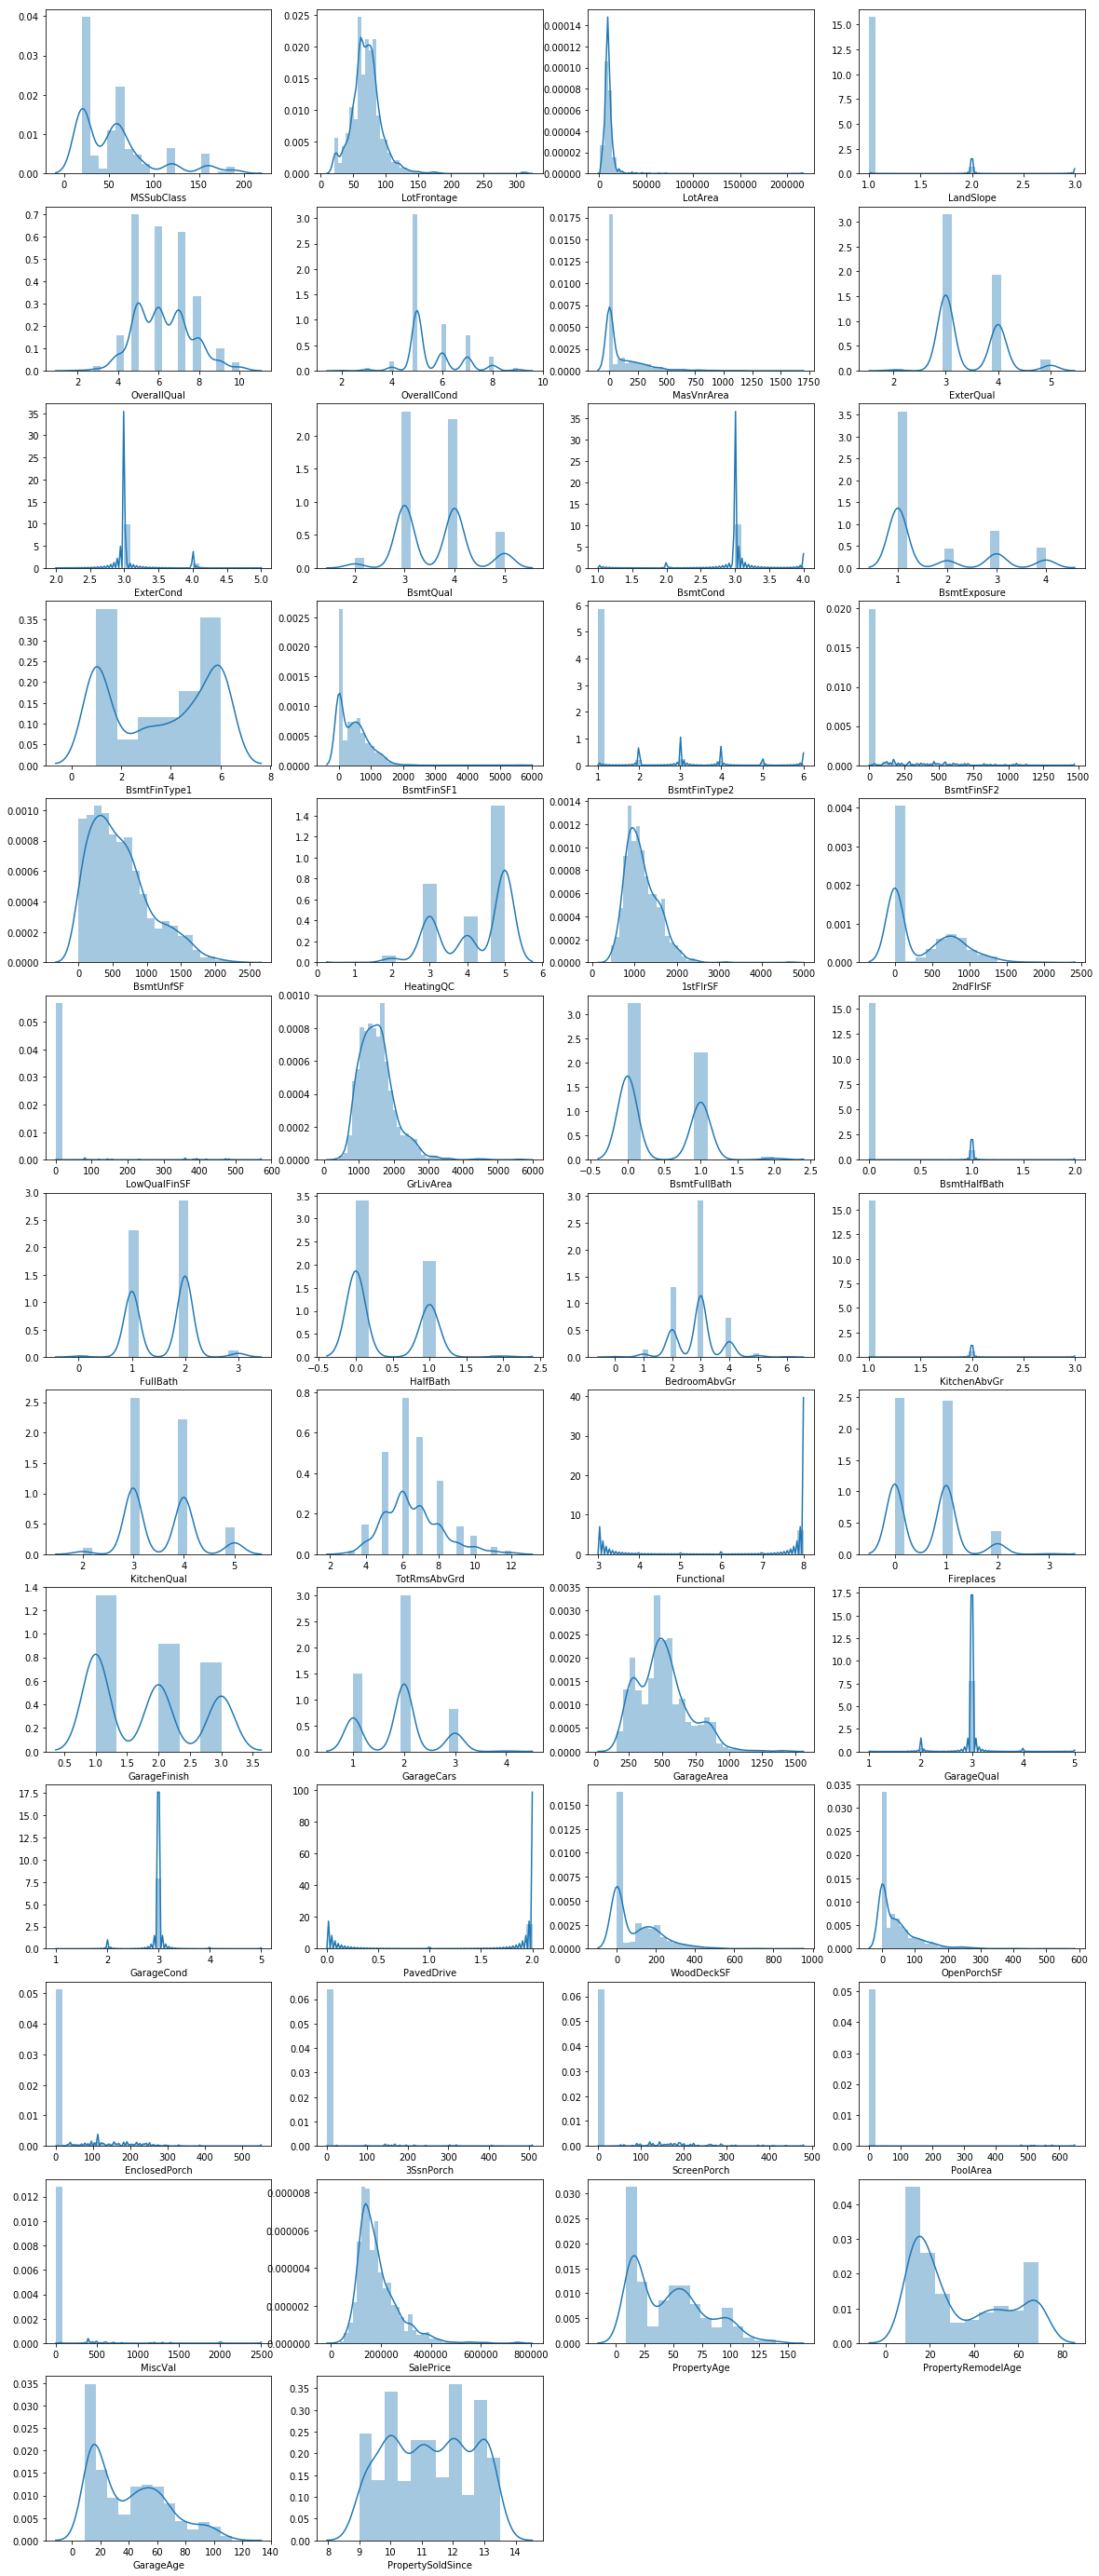

In [81]:
import math
temp
count = 1
plt.figure(figsize=(20,50))
for n in qutVar:
    plt.subplot(math.ceil(qutVar.size / 4), 4, count)
    sns.distplot(housingDF[n])
    count += 1

plt.show()

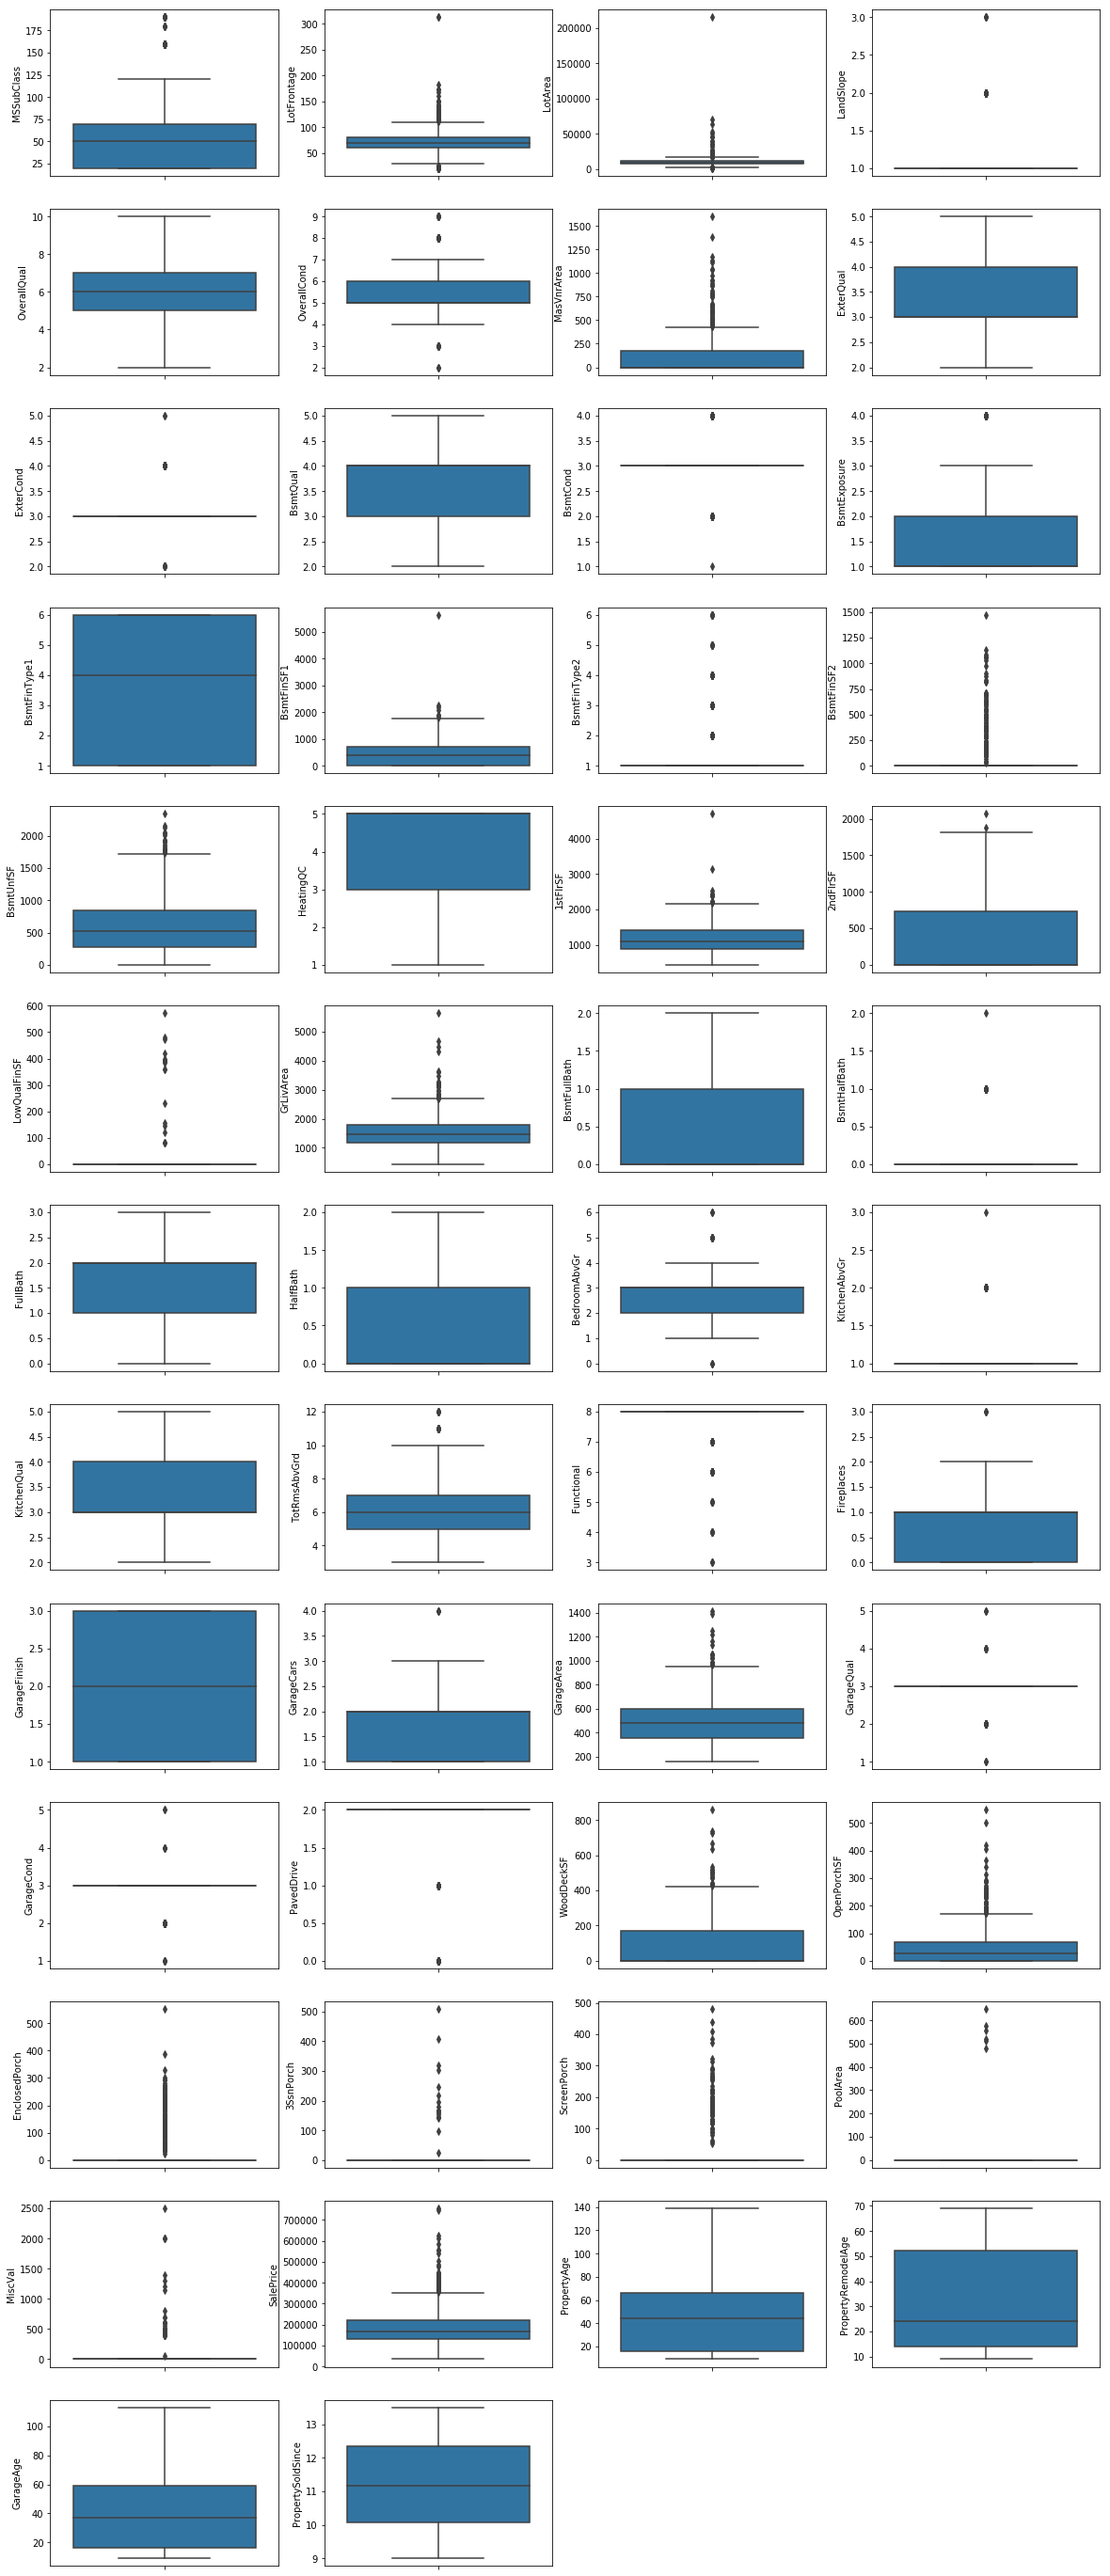

In [82]:
count = 1
plt.figure(figsize=(20,50))
for n in qutVar:
    plt.subplot(math.ceil(qutVar.size / 4), 4, count)
    sns.boxplot(y=housingDF[n])
    count += 1

plt.show()

In [51]:
housingDF.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,PropertyRemodelAge,GarageAge,PropertySoldSince
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,56.128885,70.759598,10132.346435,1.049360,6.247715,5.575868,109.855576,3.438757,3.085009,3.600548,3.011883,1.665448,3.599634,448.191956,1.270567,45.252285,606.117002,4.218464,1173.809872,356.536563,4.680987,1535.027422,0.423218,0.056673,1.577697,0.389397,2.861974,1.033821,3.562157,6.570384,7.852834,0.610603,1.808958,1.879342,503.760512,2.968007,2.968921,1.891225,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,187033.263254,46.587751,33.084095,40.400366,11.269272
std,41.976345,24.508859,8212.249621,0.236888,1.366797,1.066500,190.667459,0.586051,0.330092,0.710939,0.288298,1.036195,2.072483,468.728095,0.874521,159.075003,445.834636,0.935616,387.677463,439.260130,42.099821,526.124028,0.514253,0.235244,0.550219,0.500793,0.764107,0.185841,0.671790,1.584486,0.639724,0.633118,0.812231,0.658586,192.261314,0.270340,0.247482,0.429958,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,83165.332151,31.189752,20.930772,25.878077,1.318971
min,20.000000,21.000000,1300.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,0.000000,1.000000,1.000000,160.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000,9.000000,9.000000,9.000000,9.000000
1%,20.000000,21.000000,1680.000000,1.000000,4.000000,3.000000,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,520.000000,0.000000,0.000000,745.110000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,4.000000,4.000000,0.000000,1.000000,1.000000,180.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68493.000000,10.000000,10.000000,10.000000,9.083333
5%,20.000000,34.000000,3230.000000,1.000000,4.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,14.650000,3.000000,680.950000,0.000000,0.000000,864.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,4.000000,7.000000,0.000000,1.000000,1.000000,240.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96825.000000,12.000000,11.000000,12.000000,9.166667
25%,20.000000,60.000000,7606.750000,1.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,3.000000,894.000000,0.000000,0.000000,1164.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,8.000000,0.000000,1.000000,1.000000,360.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132500.0

Outliers in multiple columns like **LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, 1stFlrSF, 2ndFlrSF, LowQualFinSF, etc.**.<BR>
Will drop few of the colum and verify outliers again.

In [83]:
outlier_99percentile = housingDF.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).loc['99%']

In [84]:
outlierCol = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'PropertyAge', 'PropertyRemodelAge', 'GarageAge', 'PropertySoldSince']

In [87]:
for n in outlier_99percentile[outlierCol].iteritems():
    housingDF = housingDF[housingDF[n[0]] <= n[1]]

In [88]:
housingDF.shape

(941, 69)

In [89]:
tempDf.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,PropertyRemodelAge,GarageAge,PropertySoldSince
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,55.956429,68.437832,9265.200850,1.043571,6.157279,5.564293,93.326249,3.405951,3.078640,3.583422,3.013815,1.632306,3.633369,434.430393,1.232731,33.329437,592.268863,4.207226,1131.880978,325.002125,0.573858,1457.456961,0.413390,0.057386,1.551541,0.374070,2.814028,1.027630,3.529224,6.378321,7.868225,0.569607,1.787460,1.836344,488.409139,2.971307,2.971307,1.894793,86.870351,42.463337,19.557917,0.743889,12.636557,0.612115,7.676939,177892.239107,45.159405,33.403826,40.137088,11.264169
std,42.210708,20.410250,3566.728702,0.219316,1.287717,1.045436,147.517099,0.546679,0.323183,0.689358,0.285874,1.010992,2.067096,415.273535,0.794952,117.317481,426.567010,0.941135,339.151000,405.170198,8.248928,430.045267,0.507593,0.237230,0.528698,0.497149,0.722330,0.163998,0.646139,1.426690,0.593995,0.617726,0.803908,0.636477,176.071025,0.257288,0.231152,0.420972,107.168778,54.899153,54.050765,9.984311,46.288799,18.777063,60.883196,68672.183831,29.353134,21.070564,25.254098,1.304607
min,20.000000,21.000000,1300.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,0.000000,1.000000,1.000000,160.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000,9.000000,9.000000,9.000000,9.000000
1%,20.000000,21.000000,1680.000000,1.000000,4.000000,3.000000,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,520.000000,0.000000,0.000000,704.400000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,4.000000,4.400000,0.000000,1.000000,1.000000,187.200000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67560.000000,10.000000,10.000000,10.000000,9.083333
5%,20.000000,34.000000,3182.000000,1.000000,4.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,26.000000,3.000000,672.000000,0.000000,0.000000,860.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,4.000000,7.000000,0.000000,1.000000,1.000000,240.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93000.000000,12.000000,12.000000,12.000000,9.166667
25%,20.000000,59.000000,7407.000000,1.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,3.000000,872.000000,0.000000,0.000000,1131.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,8.000000,0.000000,1.000000,1.000000,350.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130000.000000,16.000000,14.000000,16.000000,10.083333
50%,50.000

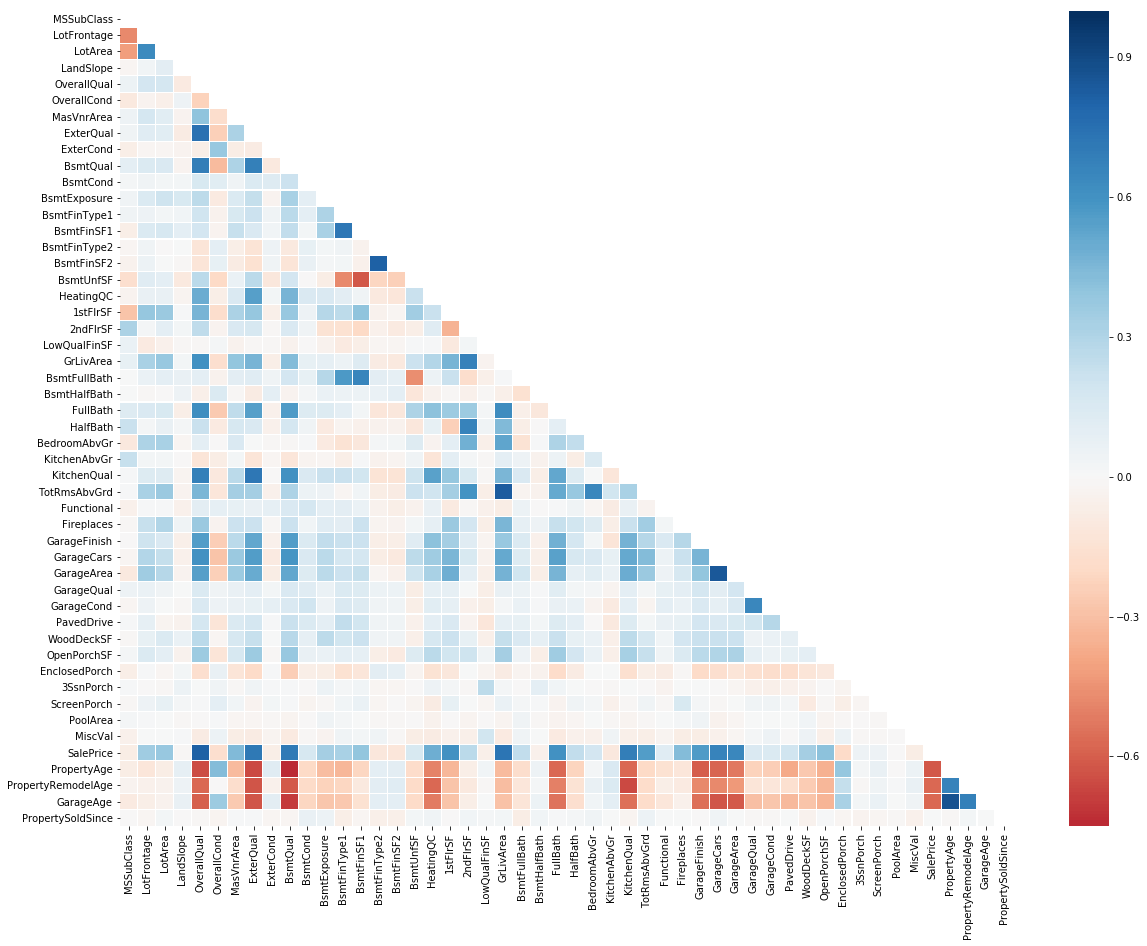

In [90]:
#Check correlation with heatmap
corr = housingDF.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='RdBu',  mask=mask, center=0, linewidths= 0.1)
plt.show()

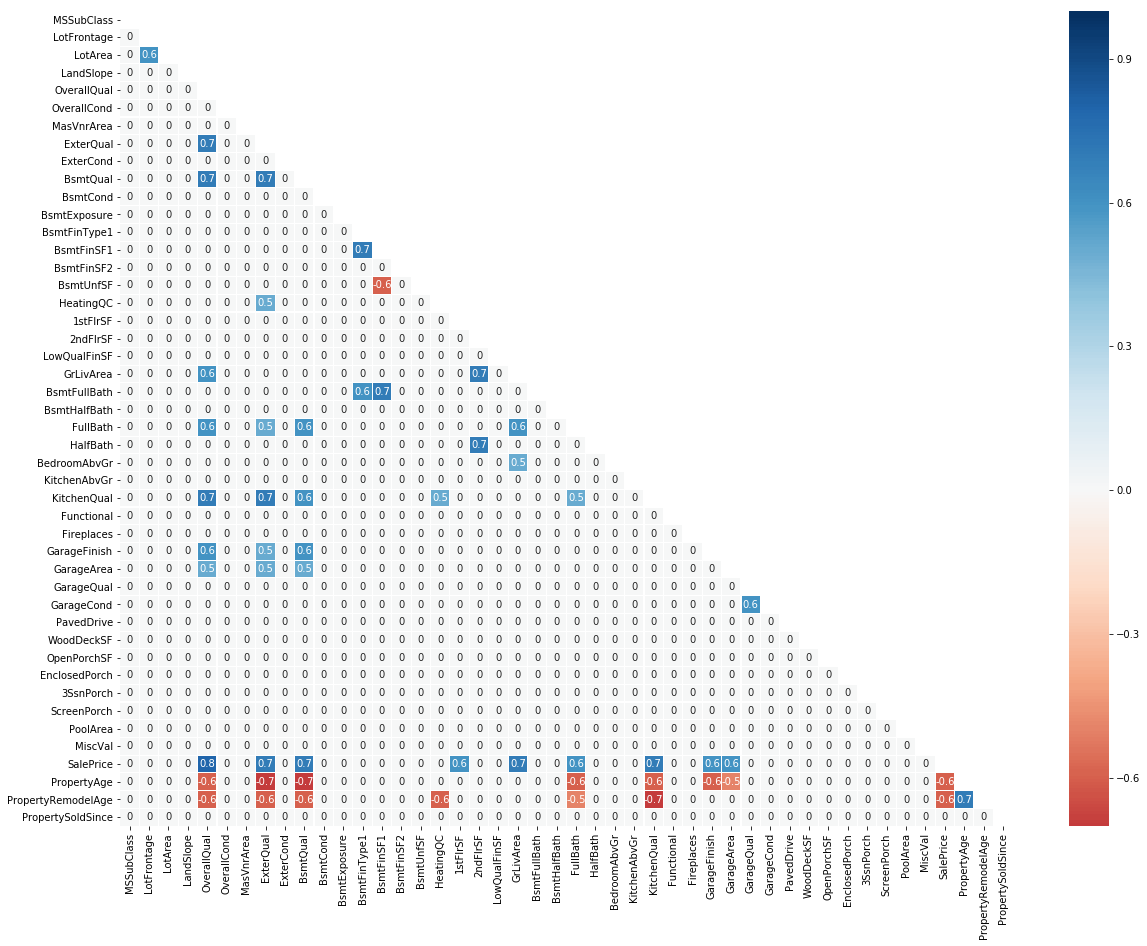

In [96]:
#Check correlation with heatmap
#Display data with high corelation only 
corr = round(housingDF.corr().applymap(lambda x : 0 if x > -0.5 and x < 0.5 else x ), 1)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='RdBu', annot=True, mask=mask, center=0, linewidths= 0.1, )
plt.show()

High coliniarity between independent variables in data set.<BR>
Will drop variable with more than 80% colliner to each other.<BR><BR>
Also above heatmap shows feature variables like **OverallQual, ExterQual, BsmtQual, 1stFlrSF, GrLivArea, FullBath, KitchenQual, GarageFinish, GarageArea, PropertyAge, PropertyRemodelAge ** have strong corelation with property **Sale Price** 

In [95]:
housingDF.drop(labels=['BsmtFinType2', 'TotRmsAbvGrd', 'GarageCars', 'GarageAge'], inplace=True, axis=1)

### Qualitative Variable Univariate & Bivariate Analysis

In [105]:
#Generic function to plot Bar chart for distribution of categorical variables
#Also compare Same categorical variable against price using Box Plot

def PlotGraph(data, column, rows= 1, cols = 2, title='', figsize=(16,4), ticksRotation = 0, valueRotation = 0):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    
    #sortOrder = sorted(data1[column].unique(), key=sort_keys)
    plt1 = sns.barplot(data=data, x=column, y='SalePrice' ,ax=ax[0], estimator=lambda x: len(x) / len(data) * 100 )
    plt2 = sns.boxplot(data=data, x=column, y='SalePrice', ax=ax[1])

    if title == '':
        title = column + ' Distribution'

    fig.suptitle(title)
    ax[0].set_ylabel('Frequency (%)')
    ax[1].set_ylabel('SalePrice')
        
    for i in range(0,len(ax)):
        plt.setp(ax[i].get_xticklabels(), rotation=ticksRotation)
        for p in ax[i].patches:
            height = p.get_height()
            ax[i].annotate('%.1f' % height + "%",(p.get_x() + 0.2, height + 0.2 + (valueRotation / 30)  ), rotation=valueRotation) 
    
    plt.show()

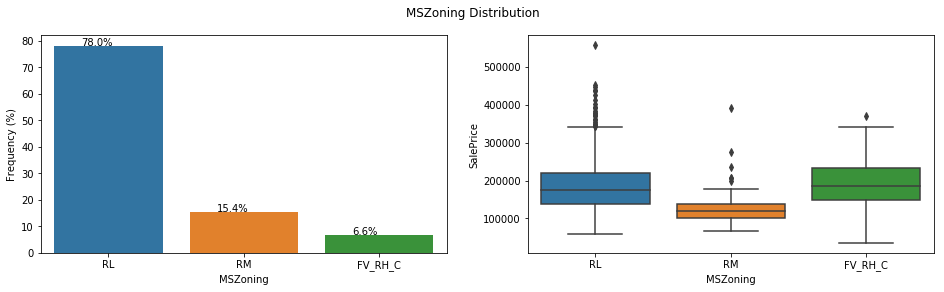

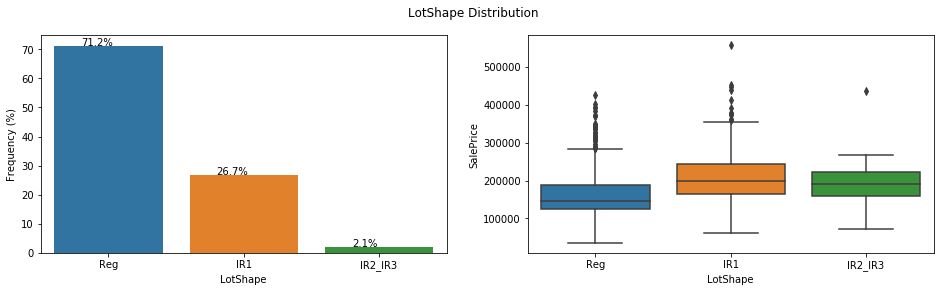

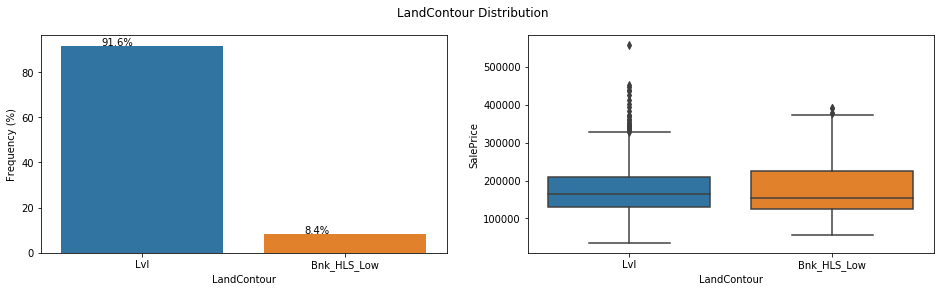

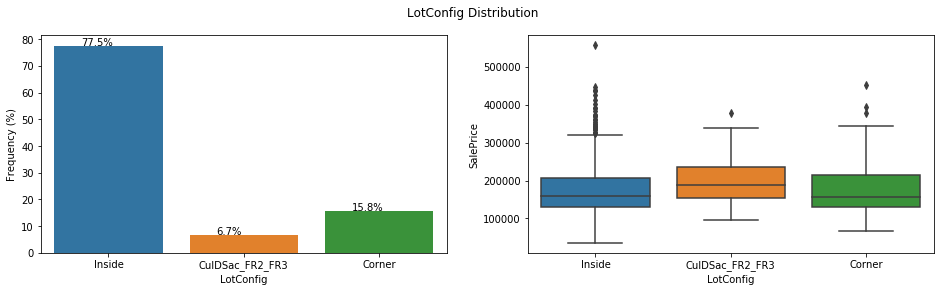

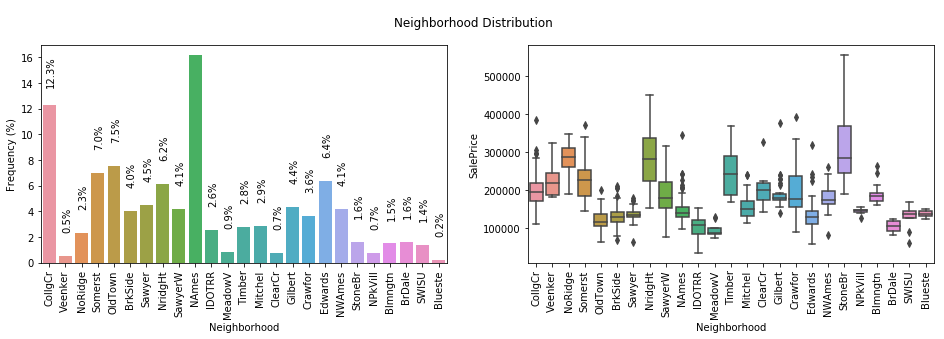

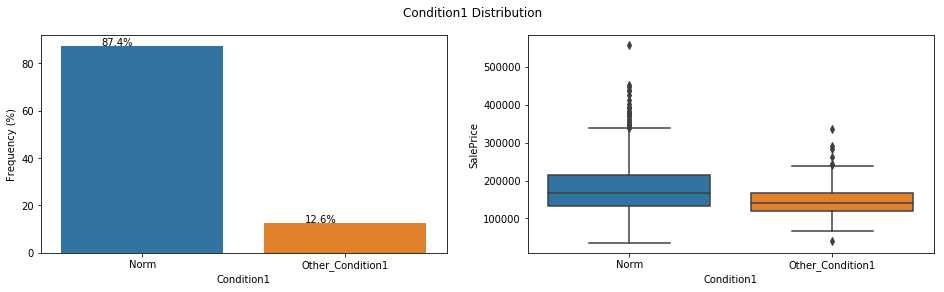

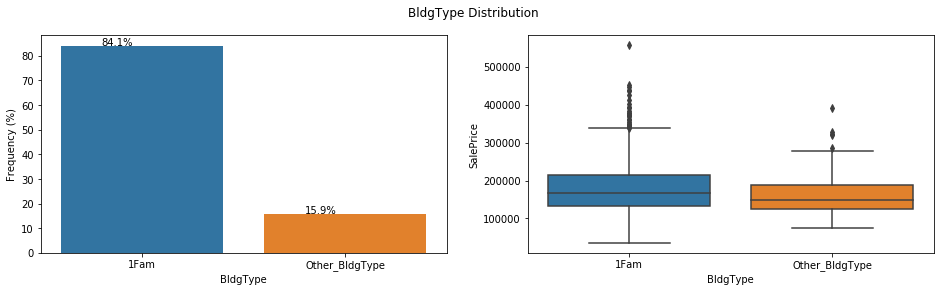

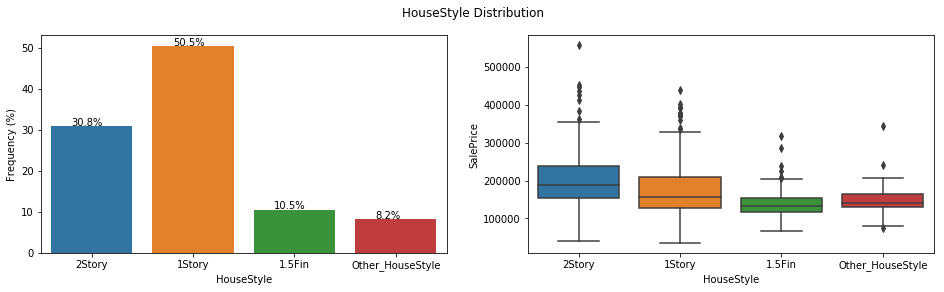

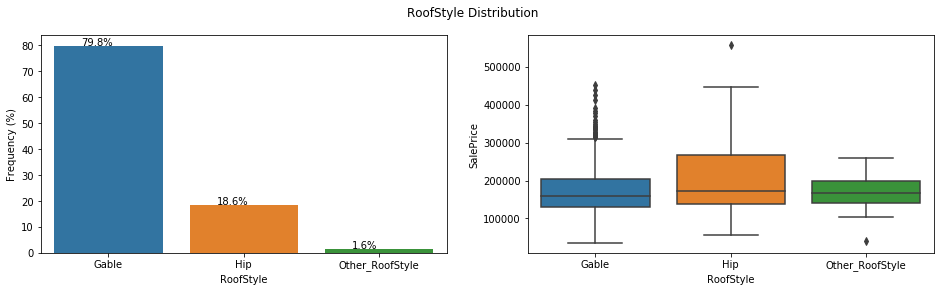

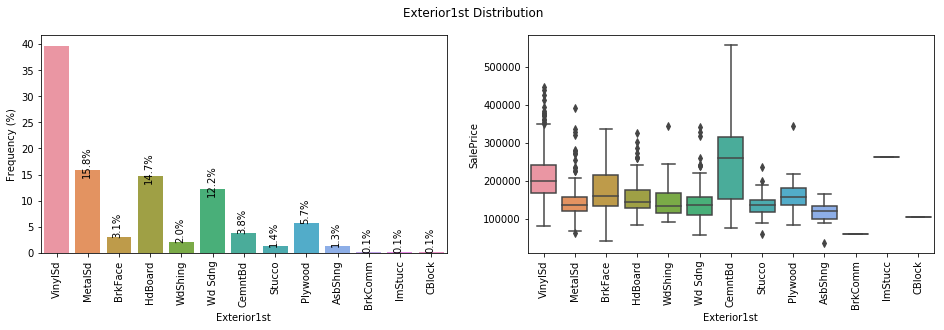

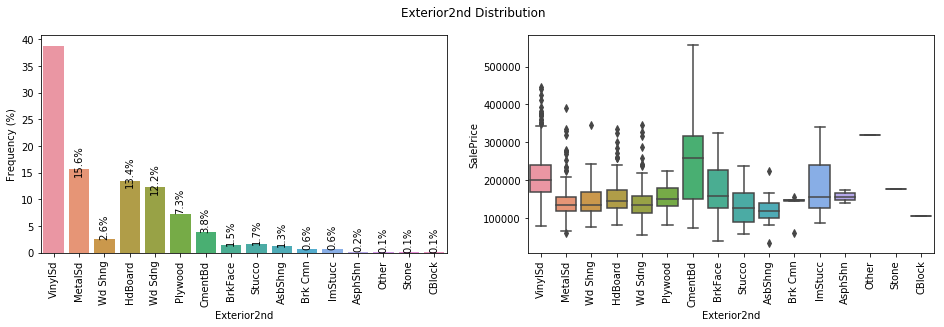

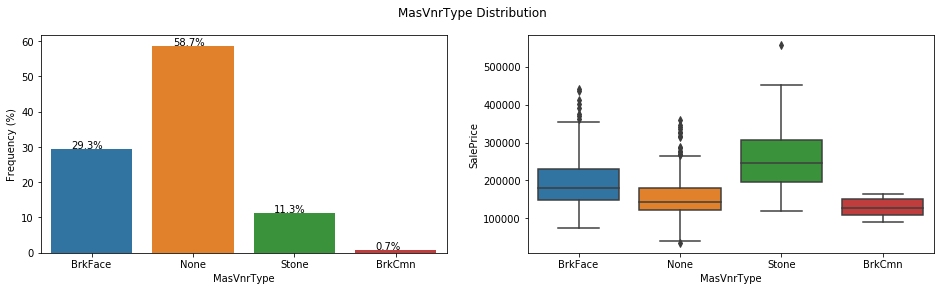

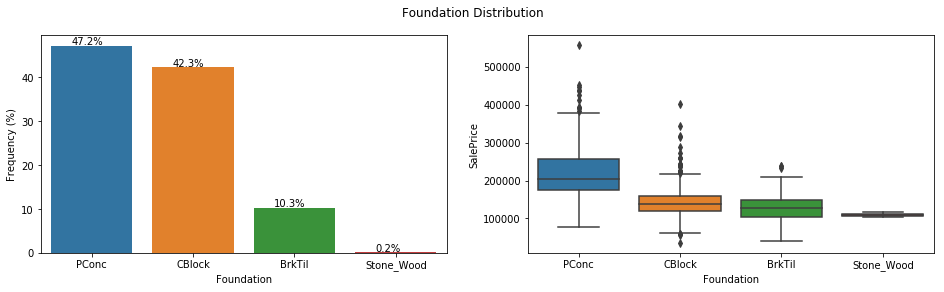

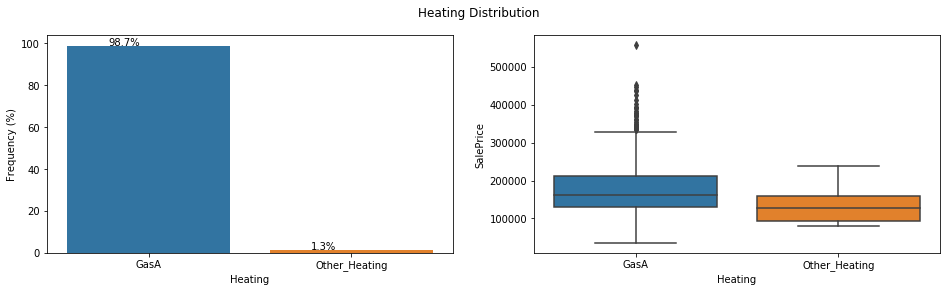

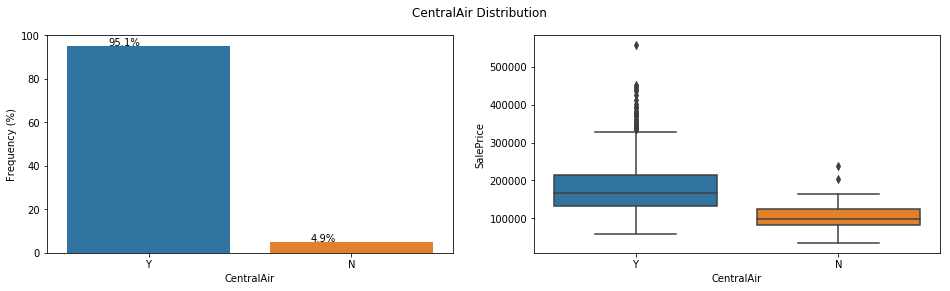

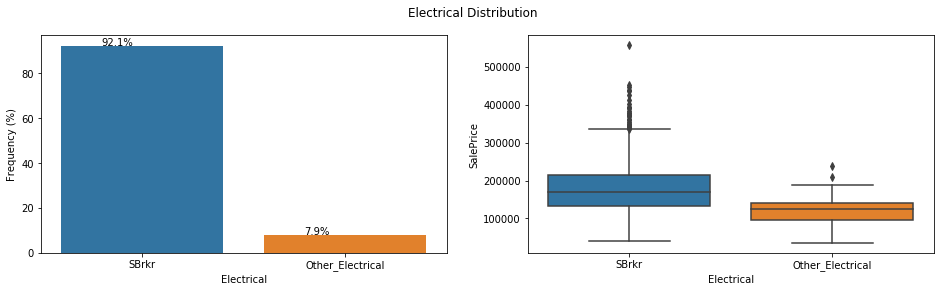

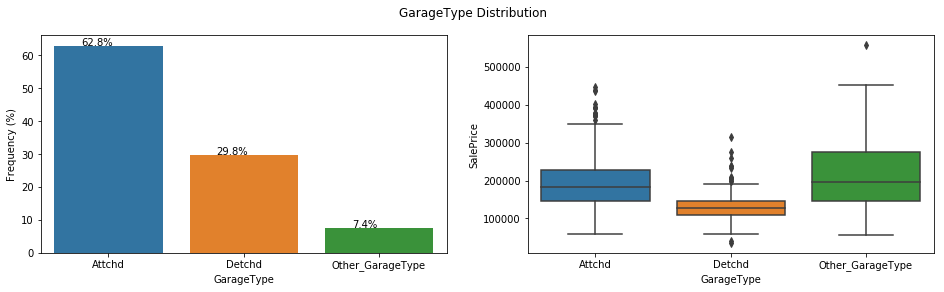

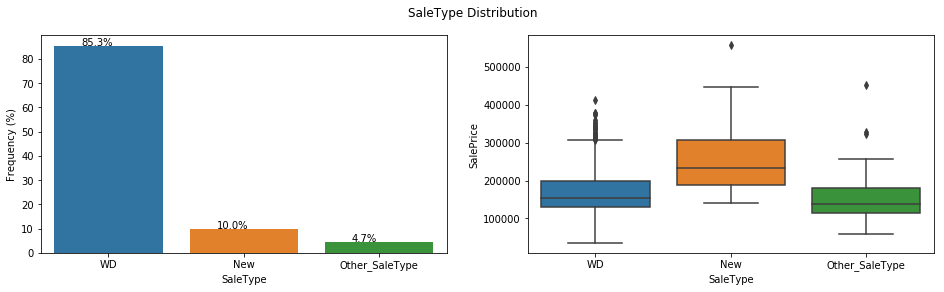

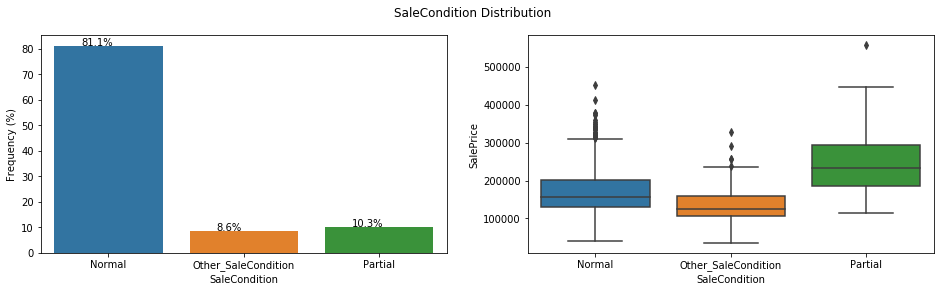

In [108]:
dummy = [PlotGraph(housingDF, col, ticksRotation=90, valueRotation=90) if col in ['Neighborhood', 'Exterior1st', 'Exterior2nd'] else PlotGraph(housingDF, col) for col in catVar ]

Most of the categorical variable is belong to single category, means almost 70- 80% data explain by only one category and emaning 20- 30 % data is distrubuted among rest of the categories.<BR>
E.g : In **MSZoning** variable most of the data (78%) explained by **RL** category.<BR>
Same for **Loat Shape, Land Contour, etc.**

### One Hot Encoding & Binary Encoding

In [130]:
housingDF['LandContour_Lvl'] = housingDF['LandContour'].apply(lambda x : 1 if x =='Lvl' else 0)
housingDF['Condition1_Normal'] = housingDF['Condition1'].apply(lambda x : 1 if x =='Norm' else 0)
housingDF['BldgType_1Fam'] = housingDF['BldgType'].apply(lambda x : 1 if x =='1Fam' else 0)
housingDF['Heating_GasA'] = housingDF['Heating'].apply(lambda x : 1 if x =='GasA' else 0)
housingDF['Electrical_SBrkr'] = housingDF['Electrical'].apply(lambda x : 1 if x =='SBrkr' else 0)
housingDF['CentralAir_Y'] = housingDF['CentralAir'].apply(lambda x : 1 if x =='Y' else 0)

housingDF.drop(labels=['LandContour', 'Condition1', 'BldgType', 'Heating', 'Electrical', 'CentralAir'], axis=1, inplace=True)

In [134]:
housingDF[housingDF.columns[housingDF.dtypes == "object"]].head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal
1,RL,Reg,CulDSac_FR2_FR3,Veenker,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,WD,Normal
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal
4,RL,IR1,CulDSac_FR2_FR3,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal
6,RL,Reg,Inside,Somerst,1Story,Gable,VinylSd,VinylSd,Stone,PConc,Attchd,WD,Normal


In [148]:
housingDF = pd.get_dummies(housingDF, columns=['MSZoning','LotShape','LotConfig','Neighborhood','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType','SaleType','SaleCondition'], prefix=['MZ','LS','LC','NH','HS','RS','Ext1','Ext2','MVT','F','GT','ST','SC'], drop_first=True)

KeyError: "None of [Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',\n       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',\n       'GarageType', 'SaleType', 'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [151]:
housingDF.head()

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,PropertyRemodelAge,PropertySoldSince,LandContour_Lvl,Condition1_Normal,BldgType_1Fam,Heating_GasA,Electrical_SBrkr,CentralAir_Y,MZ_RL,MZ_RM,LS_IR2_IR3,LS_Reg,LC_CulDSac_FR2_FR3,LC_Inside,NH_Blueste,NH_BrDale,NH_BrkSide,NH_ClearCr,NH_CollgCr,NH_Crawfor,NH_Edwards,NH_Gilbert,NH_IDOTRR,NH_MeadowV,NH_Mitchel,NH_NAmes,NH_NPkVill,NH_NWAmes,NH_NoRidge,NH_NridgHt,NH_OldTown,NH_SWISU,NH_Sawyer,NH_SawyerW,NH_Somerst,NH_StoneBr,NH_Timber,NH_Veenker,HS_1Story,HS_2Story,HS_Other_HouseStyle,RS_Hip,RS_Other_RoofStyle,Ext1_BrkComm,Ext1_BrkFace,Ext1_CBlock,Ext1_CemntBd,Ext1_HdBoard,Ext1_ImStucc,Ext1_MetalSd,Ext1_Plywood,Ext1_Stucco,Ext1_VinylSd,Ext1_Wd Sdng,Ext1_WdShing,Ext2_AsphShn,Ext2_Brk Cmn,Ext2_BrkFace,Ext2_CBlock,Ext2_CmentBd,Ext2_HdBoard,Ext2_ImStucc,Ext2_MetalSd,Ext2_Other,Ext2_Plywood,Ext2_Stone,Ext2_Stucco,Ext2_VinylSd,Ext2_Wd Sdng,Ext2_Wd Shng,MVT_BrkFace,MVT_None,MVT_Stone,F_CBlock,F_PConc,F_Stone_Wood,GT_Detchd,GT_Other_GarageType,ST_Other_SaleType,ST_WD,SC_Other_SaleCondition,SC_Partial
0,60,65.0,8450,1,7,5,196.0,4,3,4,3,1,6,706,0,150,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,2,548,3,3,2,0,61,0,0,0,0,0,208500,16,16,11.416667,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,20,80.0,9600,1,6,8,0.0,3,3,4,3,4,5,978,0,284,5,1262,0,0,1262,0,1,2,0,3,1,3,8,1,2,460,3,3,2,298,0,0,0,0,0,0,181500,43,43,12.166667,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,60,68.0,11250,1,7,5,162.0,4,3,4,3,2,6,486,0,434,5,920,866,0,1786,1,0,2,1,3,1,4,8,1,2,608,3,3,2,0,42,0,0,0,0,0,223500,18,17,10.833333,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,1,8,5,350.0,4,3,4,3,3,6,655,0,490,5,1145,1053,0,2198,1,0,2,1,4,1,4,8,1,2,836,3,3,2,192,84,0,0,0,0,0,250000,19,19,10.583333,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
6,20,75.0,10084,1,8,5,186.0,4,3,5,3,3,6,1369,0,317,5,1694,0,0,1694,1,0,2,0,3,1,4,8,1,2,636,3,3,2,255,57,0,0,0,0,0,307000,15,14,11.916667,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [140]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 1456
Columns: 126 entries, MSSubClass to SC_Partial
dtypes: float64(3), int32(14), int64(35), uint8(74)
memory usage: 446.2 KB


No **object or categorical** column in data set, Lets build model using above dataset.

## Model Building

In [143]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE

In [144]:
def GetVIFScore(df):
    vifScore = pd.DataFrame()
    vifScore['Features'] = df.columns
    vifScore['VIF'] = [round(variance_inflation_factor(df.values, i),2) for i in range(df.shape[1])]
    return vifScore

In [145]:
#Split data in train & test set
X_train, X_test = train_test_split(housingDF, test_size = 0.30, random_state = 100)
y_train = X_train.pop('SalePrice')
y_test = X_test.pop('SalePrice')

In [146]:
sd = StandardScaler()

In [ ]:
X_train[['Total Time Spent on Website', 'TotalVisits']] = sd.fit_transform(X_train[['Total Time Spent on Website', 'TotalVisits']])